In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.linear_model import QuantileRegressor
from sklearn.datasets import load_iris 

plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

# Linear Regression (최소 제곱법)

In [12]:
X,y = mglearn.datasets.make_wave(n_samples=60)
print(len(X),len(y))

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)

print("lr.coef_ : ",lr.coef_)
print("lr.intercept_ :",lr.intercept_)

print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test,y_test)))

60 60
lr.coef_ :  [0.39390555]
lr.intercept_ : -0.031804343026759746
훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


In [17]:
X, y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train,y_train)

print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test,y_test)))
print("==> 과대적합 발생")

훈련 세트 점수 : 0.94
테스트 세트 점수 : 0.78
==> 과대적합 발생


과대적합 발생 이유
- 보스턴 데이터셋에는 13개의 특성이 있음. 
- load_extended_boston() 은 각 특성의 제곱항, 교차항을 모두 추가하여 특성을 수백개로 확장
    - $X_{extended} = [x_1,x_2,\dots,x_{13},x_1^2,x_1x_2,\dots,x^2_{13},\dots]$
- LinearRegression() 은 모든 특성에 대해 가중치를 학습하지만 규제가 없기 때문에 특성 수가 많을 수록 데이터에 포함된 노이즈까지 설명하려고 함. -> 훈련 데이터에 지나치게 적합하게 됨.

# Ridge Regression

L2 규제 적용
- Loss = $\sum_i(y_i-\hat{y}_i)^2+\alpha\sum_j\omega_j^2$
- 모든 계수를 작게 만듦 (0에 가깝게)
- 모든 특성을 일정 부분 사용
- 과대적합 완화에 안정적 
- 원형 제약

In [20]:
X, y = mglearn.datasets.load_extended_boston()
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=42)
ridge = Ridge().fit(X_train,y_train)

# alpha 에 따른 훈련 / 테스트 세트 점수 변화
print("alpha = 1")
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test,y_test)))

ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("\nalpha = 10")
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test,y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("\nalpha = 0.1")
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test,y_test)))

print("\n alpha 가 클수록 규제가 많이 들어감")

alpha = 1
훈련 세트 점수 : 0.87
테스트 세트 점수 : 0.81

alpha = 10
훈련 세트 점수 : 0.77
테스트 세트 점수 : 0.73

alpha = 0.1
훈련 세트 점수 : 0.92
테스트 세트 점수 : 0.82

 alpha 가 클수록 규제가 많이 들어감


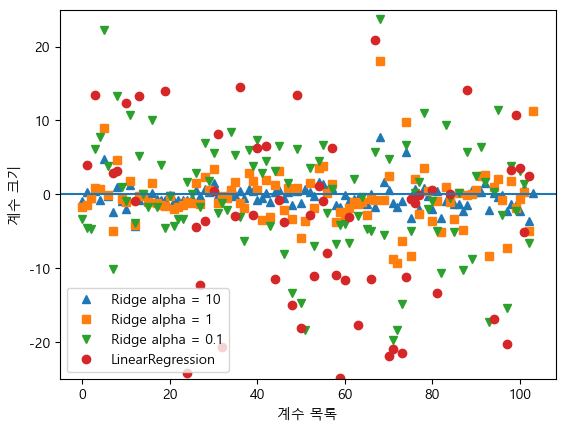

In [34]:
# alpha 값에 따른 모델의 coef_ 속성

plt.plot(ridge10.coef_,'^',label="Ridge alpha = 10")
plt.plot(ridge.coef_,'s',label="Ridge alpha = 1")
plt.plot(ridge01.coef_,'v',label='Ridge alpha = 0.1')

plt.plot(lr.coef_,'o',label='LinearRegression')
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()
#plt.yscale('log')

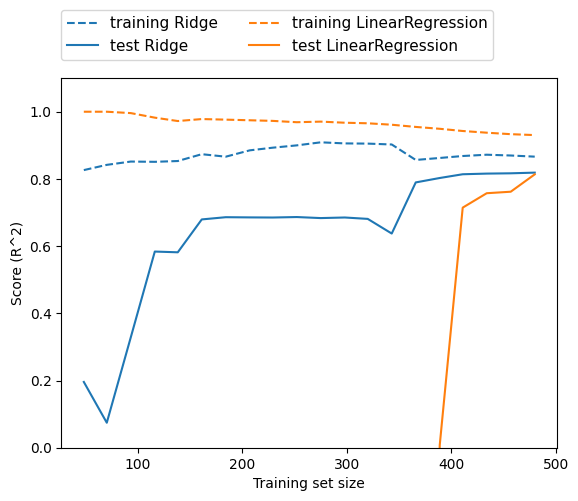

In [22]:
mglearn.plots.plot_ridge_n_samples()

- Ridge 클래스의 solver 매개변수에서 여러가지 알고리즘을 지정할 수 있음
    - 기본값은 'auto' -> 훈련 데이터가 희소 행렬이면 켤레기울기법 (Conjugate Gradient Method) 인 'sparse_cg' 를 사용하고, 그렇지 않으면 'cholesky' 를 사용함.
    - 계수 값을 양수로 강제하기 위해 positive 매개변수를 True 로 지정하면 L-BFGS-B 알고리즘인 'lbfgs'가 사용됨.
    - 확률적 평균 경사 하강법 (Stochastic Average Gradient Descent) 인 'sag'와 SAG 의 개선 버전인 'saga' 를 사용할 수 있음.

# Lasso  

L1 규제 적용
- Loss = $\sum_i(y_i-\hat{y}_i)^2+\alpha\sum_j|\omega_j|$
- 일부 계수를 0으로 만듦 -> 특성 선택 효과
- 희소 모델(Sparse Model) 생성
- 불필요한 특성 제거에 유리
- 다이아몬드형 제약

계수를 0에 가깝게 만드려고 함

In [24]:
X, y = mglearn.datasets.load_extended_boston()
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lasso=Lasso().fit(X_train,y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test,y_test)))
print("사용한 특성의 갯수 : ",np.sum(lasso.coef_ !=0)) # !=0 ==> 이 특성이 모델에 실제 사용됬는지 판단하는 조건

훈련 세트 점수 : 0.27
테스트 세트 점수 : 0.26
사용한 특성의 갯수 :  3


In [29]:
# alpha 매개변수에 따른 규제, 특성의 수
print("alpha = 1 ")
lasso1 = Lasso(alpha=1,max_iter=50000).fit(X_train,y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso1.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso1.score(X_test,y_test)))
print("사용한 특성의 수 : ",np.sum(lasso1.coef_ !=0))

print("alpha = 0.1 ")
lasso2 = Lasso(alpha=0.1,max_iter=50000).fit(X_train,y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso2.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso2.score(X_test,y_test)))
print("사용한 특성의 수 : ",np.sum(lasso2.coef_ !=0))

print("alpha = 0.01 ")
lasso4 = Lasso(alpha=0.01,max_iter=50000).fit(X_train,y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso4.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso4.score(X_test,y_test)))
print("사용한 특성의 수 : ",np.sum(lasso4.coef_ !=0))

print("alpha = 10")
lasso3 = Lasso(alpha=10,max_iter=50000).fit(X_train,y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso3.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso3.score(X_test,y_test)))
print("사용한 특성의 수 : ",np.sum(lasso3.coef_ !=0))

alpha = 1 
훈련 세트 점수 : 0.27
테스트 세트 점수 : 0.26
사용한 특성의 수 :  3
alpha = 0.1 
훈련 세트 점수 : 0.75
테스트 세트 점수 : 0.70
사용한 특성의 수 :  12
alpha = 0.01 
훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.80
사용한 특성의 수 :  34
alpha = 10
훈련 세트 점수 : 0.00
테스트 세트 점수 : -0.03
사용한 특성의 수 :  0


Text(0, 0.5, '계수 크기')

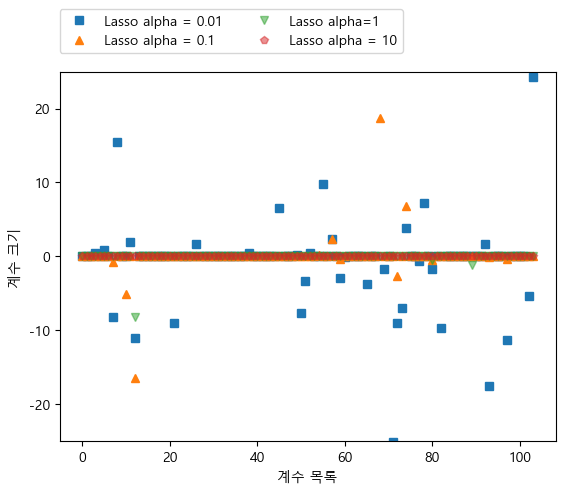

In [35]:
plt.plot(lasso4.coef_,'s',label='Lasso alpha = 0.01')
plt.plot(lasso2.coef_,'^',label='Lasso alpha = 0.1')
plt.plot(lasso1.coef_,'v',label='Lasso alpha=1',alpha=0.5)
plt.plot(lasso3.coef_,'p',label='Lasso alpha = 10',alpha=0.5)
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

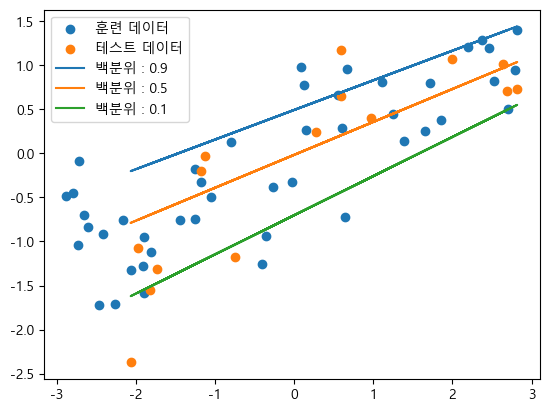

In [36]:
X, y =mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

pred_up = QuantileRegressor(quantile=0.9, alpha=0.01).fit(X_train,y_train).predict(X_test)
pred_med = QuantileRegressor(quantile=0.5,alpha=0.01).fit(X_train,y_train).predict(X_test)
pred_low = QuantileRegressor(quantile=0.1,alpha=0.01).fit(X_train,y_train).predict(X_test)

plt.scatter(X_train,y_train,label="훈련 데이터")
plt.scatter(X_test,y_test,label="테스트 데이터")
plt.plot(X_test,pred_up,label='백분위 : 0.9')
plt.plot(X_test,pred_med,label="백분위 : 0.5")
plt.plot(X_test,pred_low,label="백분위 : 0.1")
plt.legend()
plt.show()